# Script to make batch statistics of the conflict task runs

In [1]:
from scipy.io import loadmat
import os
import re

from Functions.Features import Features, FeaturePlotter, FeatureComparator

In [2]:
# List all files in the directory
data_dir = './Data/MatlabDatafiles'
files = os.listdir(data_dir)

# Filter out the .mat files
mat_files = [file for file in files if file.endswith('.mat')]

print(mat_files)

['Jul_13_Run1.mat', 'Jul_13_Run2.mat']


In [3]:
# Load the .mat files
dataset:dict[str, dict[int, dict]] = dict() # Create a dictionary to store the data (patient > runs > variables for each run)
for file in mat_files:
    filename = os.path.splitext(file)[0]
    code = re.split(r'_run', filename, flags=re.IGNORECASE)[0]
    run = re.split(r'_run', filename, flags=re.IGNORECASE)[1]

    if code not in dataset:
        dataset[code] = dict()
    if run not in dataset[code]:
        dataset[code][run] = dict()
    
    data = loadmat(os.path.join(data_dir, file))

    dataset[code][run] = data

    dataset[code][run]['test_type'] = dataset[code][run]['test_type'][dataset[code][run]['test_type'] != 0]

print(dataset.keys())
print(next(iter(dataset.values())).keys())
print(dataset['Jul_13']['1']['correct_nbr'].flatten())

dict_keys(['Jul_13'])
dict_keys(['1', '2'])
[214]


In [4]:
ft = Features(dataset, only_physiological=True)

# Single run features
print("--------------------")
print("Single run features")
print("--------------------")
ft.calculate_single_run_features()
ft.print_single_run_features()
ft.calculate_single_run_features_by_type()
ft.print_single_run_features_by_type()

# Subject features
print("--------------------")
print("Subject features")
print("--------------------")
ft.calculate_subject_features()
ft.print_subject_features()
ft.calculate_subject_features_by_type()
ft.print_subject_features_by_type()

# Overall features
print("--------------------")
print("Overall features")
print("--------------------")
ft.calculate_overall_features()
ft.print_overall_features()
ft.calculate_overall_features_by_type()
ft.print_overall_features_by_type()

--------------------
Single run features
--------------------
Subject: Jul_13
	Run 1:
		mean: 334.483 ms
		median: 315 ms
		std: 78.8492 ms
		min: 214 ms
		max: 655.501 ms
	Run 2:
		mean: 289.13 ms
		median: 278.5 ms
		std: 51.337 ms
		min: 204.5 ms
		max: 465 ms
Subject: Jul_13
	Run 1:
		Test type 1:
			mean: 329.143 ms
			median: 302 ms
			std: 83.1072 ms
			min: 214 ms
			max: 655.501 ms
			normality: No
		Test type 2:
			mean: 360.944 ms
			median: 348 ms
			std: 76.6767 ms
			min: 266.5 ms
			max: 617.501 ms
			normality: No
		Test type 3:
			mean: 325.704 ms
			median: 308.5 ms
			std: 68.8285 ms
			min: 216.5 ms
			max: 565.001 ms
			normality: No
		Test type 4:
			mean: 319.98 ms
			median: 294.5 ms
			std: 79.3702 ms
			min: 215 ms
			max: 611.501 ms
			normality: No
		Heterotopic over homotopic ratio: 1.0707
	Run 2:
		Test type 1:
			mean: 296.145 ms
			median: 286 ms
			std: 55.5404 ms
			min: 209.5 ms
			max: 429.5 ms
			normality: No
		Test type 2:
			mean: 305.041 ms
			m

Plotting single run features by type
Subject: Jul_13, Run: 1


<Figure size 1000x800 with 0 Axes>

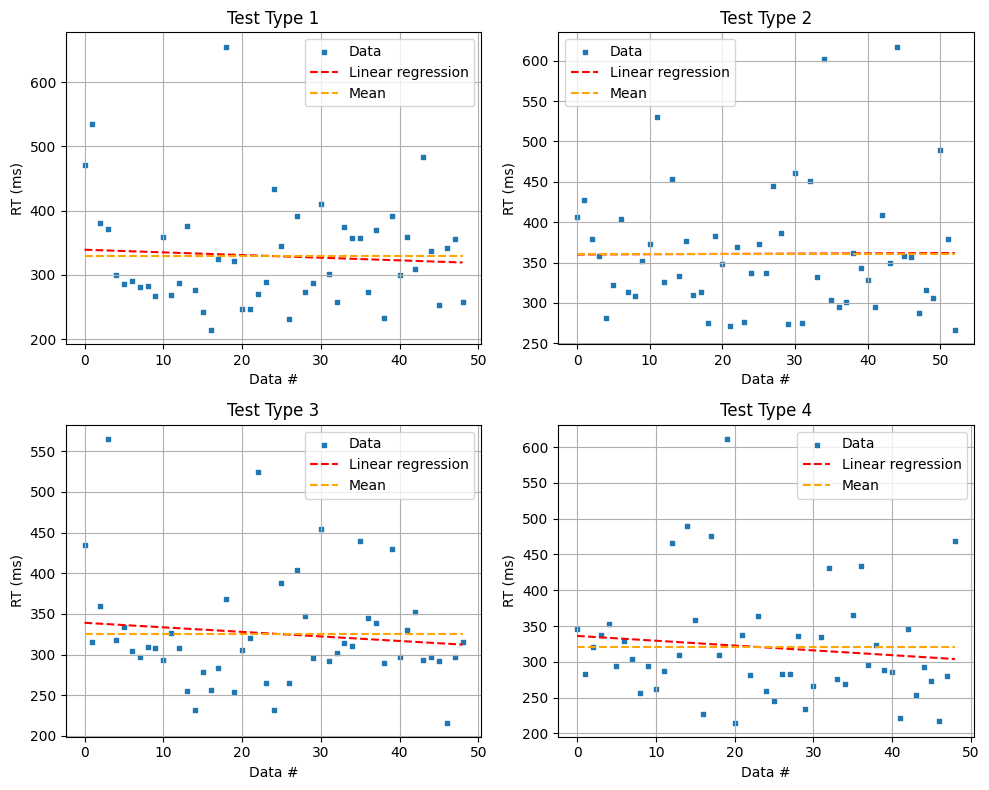

Subject: Jul_13, Run: 2


<Figure size 1000x800 with 0 Axes>

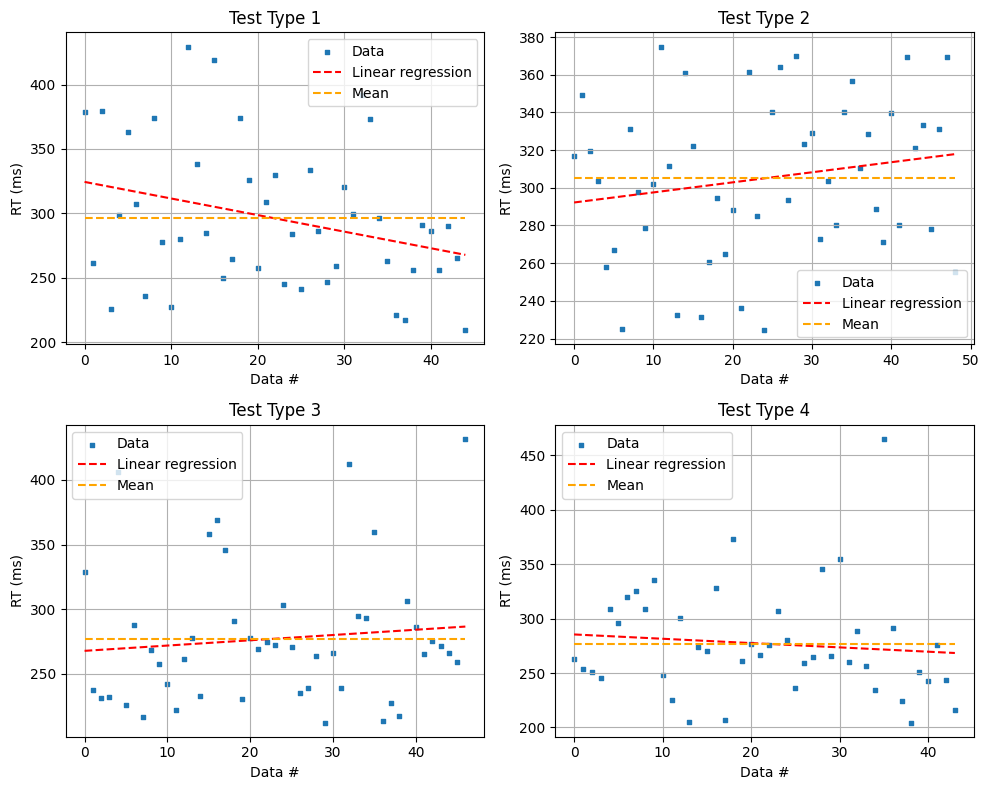

-------------------
Plotting subject features by type
Subject: Jul_13


<Figure size 1000x800 with 0 Axes>

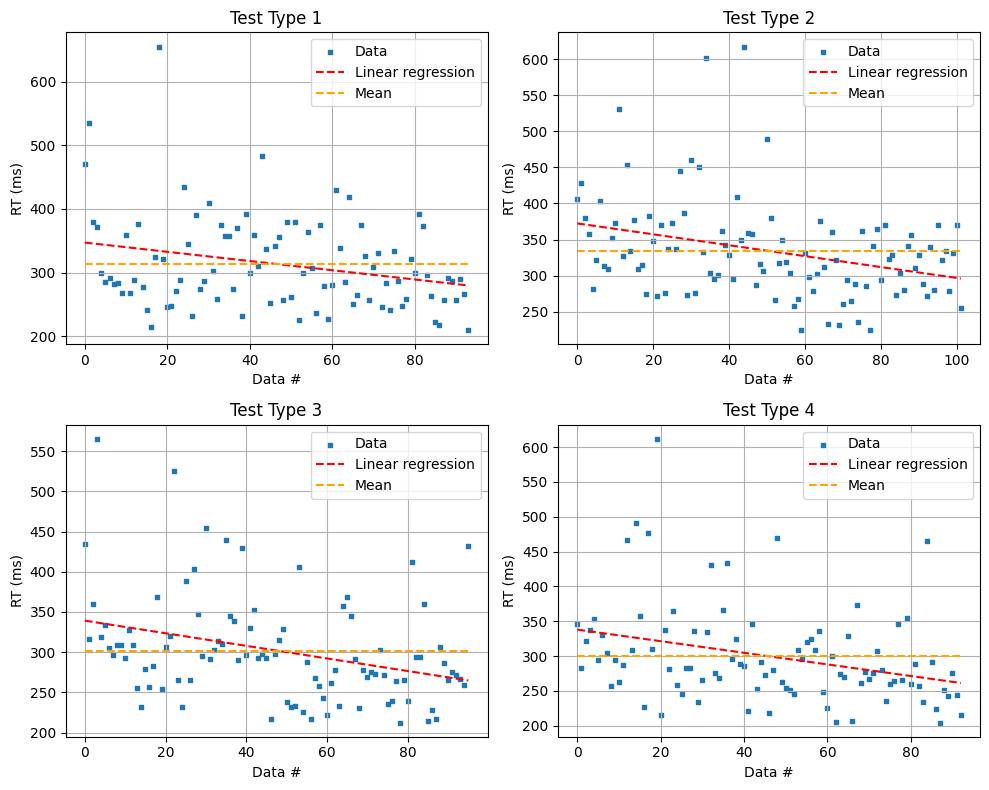

-------------------
Plotting overall features by type
Overall features by type


<Figure size 1000x800 with 0 Axes>

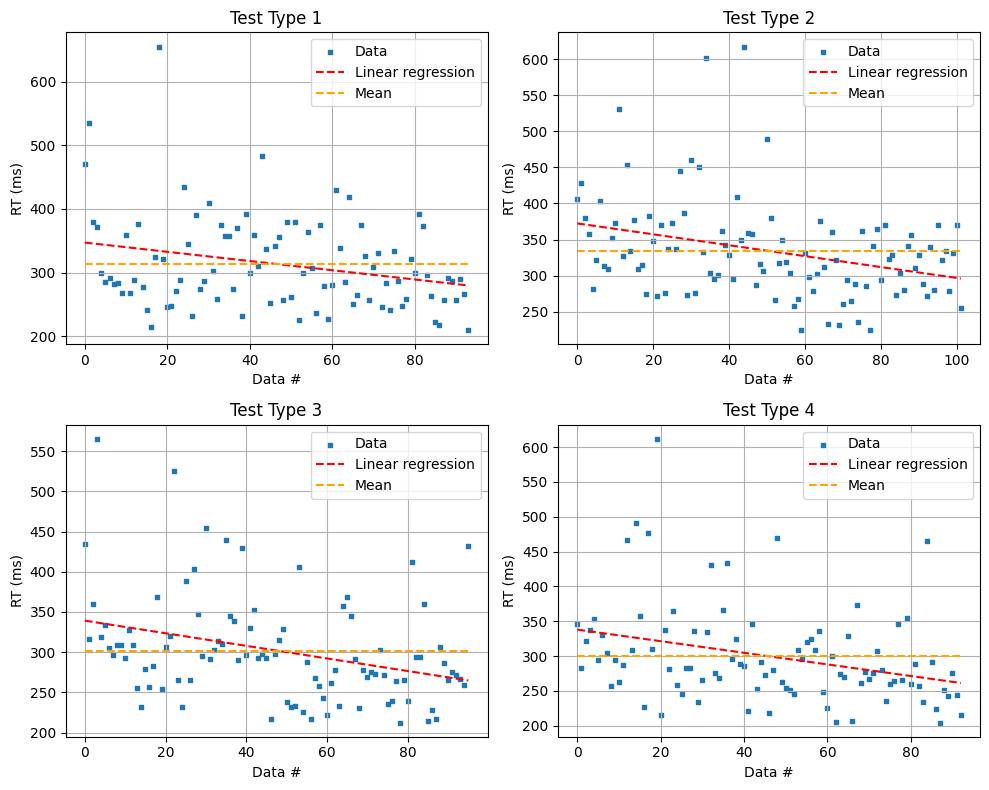

In [5]:
# Plotting
fp = FeaturePlotter(ft)

print('Plotting single run features by type')
fp.plot_single_run_features_by_type()
print('-------------------')

print('Plotting subject features by type')
fp.plot_subject_features_by_type()
print('-------------------')

print('Plotting overall features by type')
fp.plot_overall_features_by_type()

In [6]:
# Save the features to a CSV file in the current directory
ft.save_all_to_csv('./Export/')

# Do the same analysis with the box data

In [7]:
box_data_dir = './Data/CompleteData/Test_box'

# List all files in the directory
files = os.listdir(box_data_dir)

# Filter out the .mat files
box_files = [file for file in files if file.endswith('.mat')]

print(box_files)

['Jul_13_Run1.mat', 'Jul_13_Run2.mat']


In [8]:
# Load the .mat files
box_dataset:dict[str, dict[int, dict]] = dict() # Create a dictionary to store the data (patient > runs > variables for each run)
for file in box_files:
    filename = os.path.splitext(file)[0]
    code = re.split(r'_run', filename, flags=re.IGNORECASE)[0]
    run = re.split(r'_run', filename, flags=re.IGNORECASE)[1]

    if code not in box_dataset:
        box_dataset[code] = dict()
    if run not in box_dataset[code]:
        box_dataset[code][run] = dict()
    
    data = loadmat(os.path.join(box_data_dir, file))

    box_dataset[code][run] = data
    print(box_dataset[code][run].keys())
    print('-------------------')

for code in box_dataset:
    for run in box_dataset[code]:
        # Remove bad trials
        box_dataset[code][run]['test_type'] = box_dataset[code][run]['triallist']

        box_dataset[code][run]['acc_test_type'] = box_dataset[code][run]['triallist']

        box_dataset[code][run]['rt_acc'] = box_dataset[code][run]['presstime']
        box_dataset[code][run]['acc_test_type'] = box_dataset[code][run]['acc_test_type'][box_dataset[code][run]['rt_acc'] != 99]
        box_dataset[code][run]['rt_acc'] = box_dataset[code][run]['rt_acc'][box_dataset[code][run]['rt_acc'] != 99] * 1000


dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expName', 'pressname', 'date', 'stimname', 'logno', 'accuracy'])
-------------------
dict_keys(['__header__', '__version__', '__globals__', 'triallist', 'stimonset', 'presstime', 'expName', 'pressname', 'date', 'stimname', 'logno', 'accuracy'])
-------------------


In [11]:
bft = Features(box_dataset, only_physiological=True)
bft.calculate_single_run_features()
bft.calculate_single_run_features_by_type()
bft.calculate_subject_features()
bft.calculate_subject_features_by_type()
bft.calculate_overall_features()
bft.calculate_overall_features_by_type()

bft.print_single_run_features()
bft.print_single_run_features_by_type()
bft.print_subject_features()
bft.print_subject_features_by_type()
bft.print_overall_features()
bft.print_overall_features_by_type()

Subject: Jul_13
	Run 1:
		mean: 376.295 ms
		median: 360.737 ms
		std: 78.442 ms
		min: 229.463 ms
		max: 654.554 ms
	Run 2:
		mean: 318.164 ms
		median: 308.087 ms
		std: 50.4777 ms
		min: 211.099 ms
		max: 448.534 ms
Subject: Jul_13
	Run 1:
		Test type 1:
			mean: 390.323 ms
			median: 370.962 ms
			std: 91.1061 ms
			min: 260.385 ms
			max: 634.766 ms
			normality: No
		Test type 2:
			mean: 385.261 ms
			median: 369.463 ms
			std: 70.9382 ms
			min: 291.155 ms
			max: 654.554 ms
			normality: No
		Test type 3:
			mean: 344.462 ms
			median: 334.027 ms
			std: 69.014 ms
			min: 229.463 ms
			max: 618.764 ms
			normality: No
		Test type 4:
			mean: 417.395 ms
			median: 410.722 ms
			std: 76.1046 ms
			min: 312.472 ms
			max: 589.419 ms
			normality: No
		Heterotopic over homotopic ratio: 1.05141
	Run 2:
		Test type 1:
			mean: 276.889 ms
			median: 276.04 ms
			std: 31.6632 ms
			min: 238.318 ms
			max: 357.446 ms
			normality: Yes
		Test type 2:
			mean: 342.205 ms
			median: 341.0

In [10]:
# Correlation matrix between the features

